# Flight Price Prediction

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest
available ticket on a given flight gets more and less expensive over time. This usually happens as
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order
to reduce sales and hold back inventory for those expensive last-minute expensive
purchases)
So, you have to work on a project where you collect data of flight fares with other features and
work to make a model to predict fares of flights.

# Importing the dataset

In [1]:
import pandas as pd
df=pd.read_csv('flight_tableau.csv')
df.head()

,Unnamed: 0,Company Name,No of stops,No of days in advanced booked,class,where to where,Route Value,Departure Time,Duration,Price,distance in km
0,0,Air Asia,1,1,Economy,Delhi - Mumbai,3,8.00,6.58,5953,1148
1,1,Air Asia,1,1,Economy,Delhi - Mumbai,3,9.42,6.58,5953,1148
2,2,Air Asia,1,1,Economy,Delhi - Mumbai,3,12.67,7.58,5953,1148
3,3,Air Asia,1,1,Economy,Delhi - Mumbai,3,11.92,8.33,5953,1148
4,4,Air Asia,1,1,Economy,Delhi - Mumbai,3,8.00,8.58,5953,1148


In [2]:
df.drop('Unnamed: 0',axis=1,inplace=True)

# Importing the required libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from heatmap import heatmap,corrplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [4]:
df.head()

,Company Name,No of stops,No of days in advanced booked,class,where to where,Route Value,Departure Time,Duration,Price,distance in km
0,Air Asia,1,1,Economy,Delhi - Mumbai,3,8.00,6.58,5953,1148
1,Air Asia,1,1,Economy,Delhi - Mumbai,3,9.42,6.58,5953,1148
2,Air Asia,1,1,Economy,Delhi - Mumbai,3,12.67,7.58,5953,1148
3,Air Asia,1,1,Economy,Delhi - Mumbai,3,11.92,8.33,5953,1148
4,Air Asia,1,1,Economy,Delhi - Mumbai,3,8.00,8.58,5953,1148


In [5]:
df['Company Name'].value_counts()

Vistara Premium Economy    437
Air India Business         355
Vistara Business           195
IndiGo                     185
Go First                   140
Air Asia                    98
SpiceJet                    67
Air India                   56
Vistara                     54
Name: Company Name, dtype: int64

In [6]:
df['Company Name'].replace(['Vistara Premium Economy','Vistara Business','Vistara'],['Vistara','Vistara','Vistara'],inplace=True)

In [7]:
df['Company Name'].replace(['Air India Business'],['Air India'],inplace=True)

In [8]:
df['Company Name'].value_counts()

Vistara      686
Air India    411
IndiGo       185
Go First     140
Air Asia      98
SpiceJet      67
Name: Company Name, dtype: int64

# Univariate Data Analysis

**Column 1: Company Name**

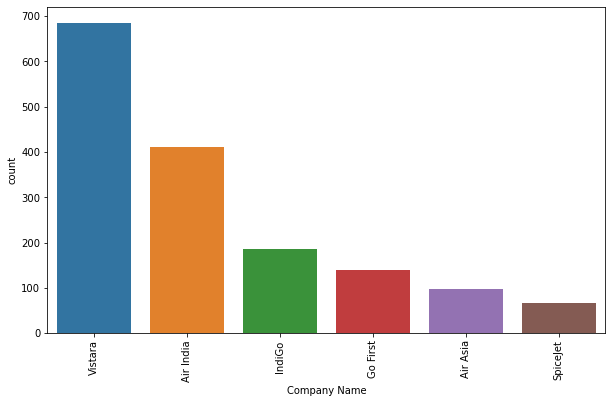

In [9]:
plt.figure(figsize=(10,6))
count1=sns.countplot(df['Company Name'],order = df['Company Name'].value_counts().index)
count1.set_xticklabels(count1.get_xticklabels(),rotation=90)
plt.show()

Observations:
    
    1.Most of the flights are from the company Vistara followed by Air India, IndiGo, Go First ,Air Asia, Spicejet

**Column 2: Number of stops**

<AxesSubplot:xlabel='No of stops', ylabel='count'>

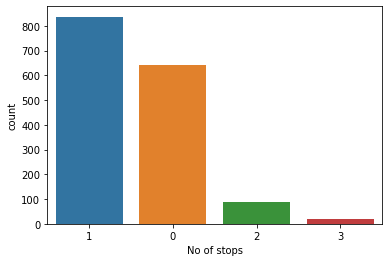

In [10]:
sns.countplot(df['No of stops'],order=df['No of stops'].value_counts().index)

Observations:
    
    1.In the data we have the flight with 1 number of stops are in abundant followed by 0,2 and 3.

**Column 1:No of days in advanced the ticket has been booked**

<AxesSubplot:xlabel='No of days in advanced booked', ylabel='count'>

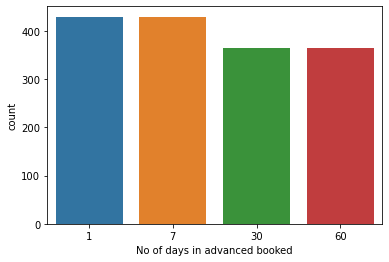

In [12]:
sns.countplot(df['No of days in advanced booked'])

**Column 4: Departure Time**

<AxesSubplot:xlabel='Departure Time', ylabel='Density'>

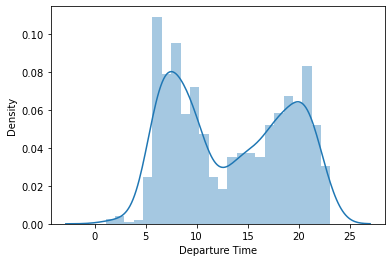

In [19]:
sns.distplot(df['Departure Time'],bins=24)

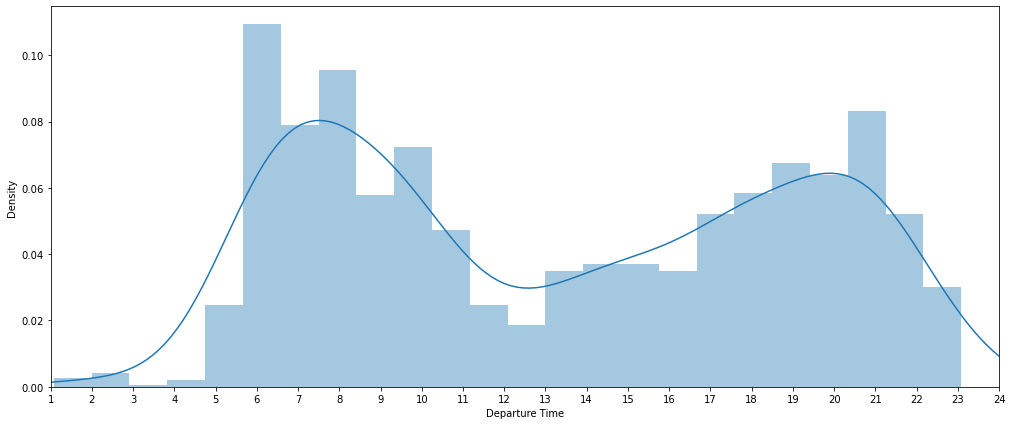

In [24]:
fig, ax = plt.subplots(figsize=(17,7))
sns.distplot(df['Departure Time'], ax=ax,bins=24)
ax.set_xlim(1,24)
ax.set_xticks(range(1,25))
plt.show()

Observations:
    
    1.From the above observations we can say that most of the flight departures at 6am, 8am, 7am and 9pm.

# Multivariate Analysis

In [25]:
# To do the multivariate analysis we have to carry out the label encoding.

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
#one hot encoding the data for model building
df1=pd.get_dummies(df)

In [29]:
pd.set_option('display.max_columns',None)

In [30]:
df1.head()

,No of stops,No of days in advanced booked,Route Value,Departure Time,Duration,Price,distance in km,Company Name_Air Asia,Company Name_Air India,Company Name_Go First,Company Name_IndiGo,Company Name_SpiceJet,Company Name_Vistara,class_Business,class_Economy,class_Premium Economy,where to where_Delhi - Bengaluru,where to where_Delhi - Chennai,where to where_Delhi - Hyderabad,where to where_Delhi - Kolkata,where to where_Delhi - Mumbai,where to where_Mumbai - Bengaluru
0,1,1,3,8.00,6.58,5953,1148,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,1,3,9.42,6.58,5953,1148,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,1,3,12.67,7.58,5953,1148,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1,1,3,11.92,8.33,5953,1148,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,1,3,8.00,8.58,5953,1148,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [32]:
#Label encoding the data for analysis purpose

In [33]:
df2=df.copy()

In [34]:
df2.head()

,Company Name,No of stops,No of days in advanced booked,class,where to where,Route Value,Departure Time,Duration,Price,distance in km
0,Air Asia,1,1,Economy,Delhi - Mumbai,3,8.00,6.58,5953,1148
1,Air Asia,1,1,Economy,Delhi - Mumbai,3,9.42,6.58,5953,1148
2,Air Asia,1,1,Economy,Delhi - Mumbai,3,12.67,7.58,5953,1148
3,Air Asia,1,1,Economy,Delhi - Mumbai,3,11.92,8.33,5953,1148
4,Air Asia,1,1,Economy,Delhi - Mumbai,3,8.00,8.58,5953,1148


In [35]:
df2['Company Name']=le.fit_transform(df2['Company Name'])

In [37]:
df2['class']=le.fit_transform(df2['class'])
df2['where to where']=le.fit_transform(df2['where to where'])

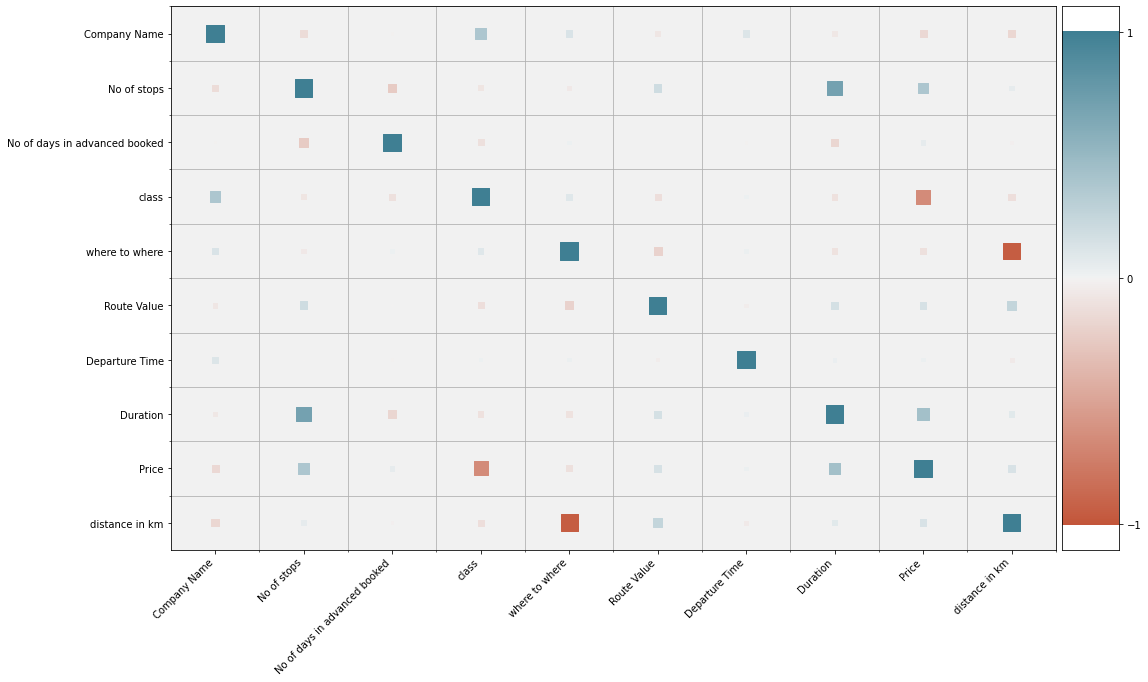

In [42]:
from heatmap import heatmap,corrplot
plt.figure(figsize=(17,10))
corrplot(df2.corr(),size_scale=300)
plt.show()

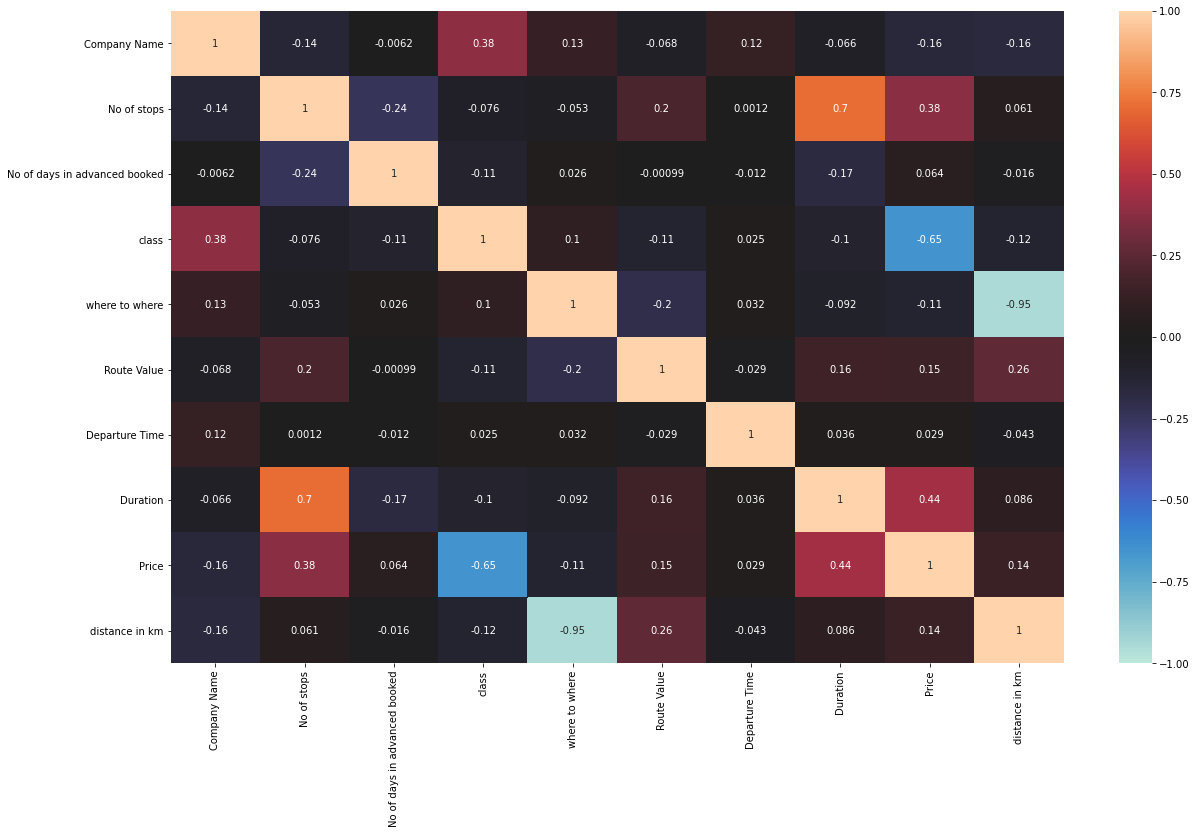

In [43]:
plt.figure(figsize=(20,12))
sns.heatmap(df2.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

In [45]:
corr_matrix=df2.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price                            1.000000
Duration                         0.440111
No of stops                      0.380635
Route Value                      0.148760
distance in km                   0.138506
No of days in advanced booked    0.064044
Departure Time                   0.029354
where to where                  -0.113635
Company Name                    -0.155827
class                           -0.651917
Name: Price, dtype: float64

Observations:
    
    From the above observations we can say that price column has got a significant correlation with the following columns
    1.class
    2.Duration
    3.No of stops
    4.company name
    5.Route value
    6.distance in km

Observations:
    
    There is significant correlation between independent random variables, following are the pairs
    1.class vs company
    2.Duration vs no of steps

# Bi Variate Analysis

**Price vs class**

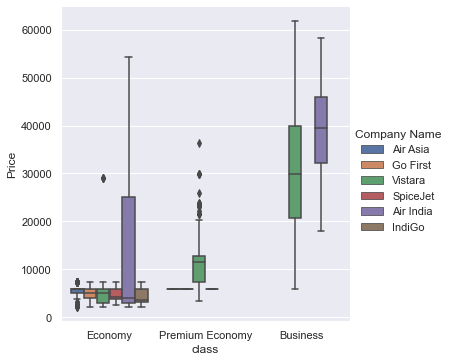

In [58]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.catplot(x="class", y="Price", hue="Company Name", kind="box", data=df)

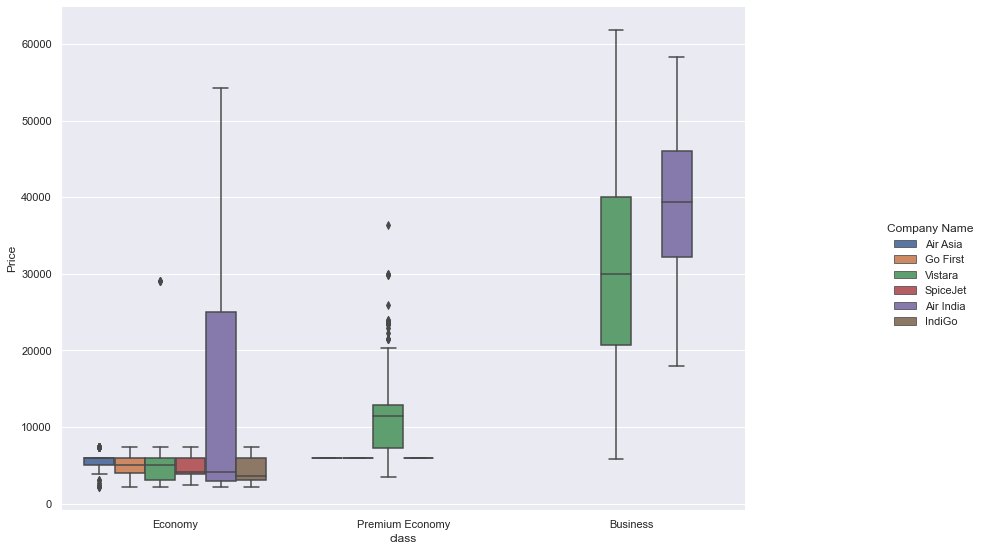

In [61]:
sns.catplot(x="class", y="Price", hue="Company Name", kind="box", data=df)
plt.gcf().set_size_inches(15, 8)

Observations:
    
    1.From the above observations we can say that if you want to book a economy class ticket then book it from spice jet, and choose vistara for premium economy and Business class.

**Price vs Duration**

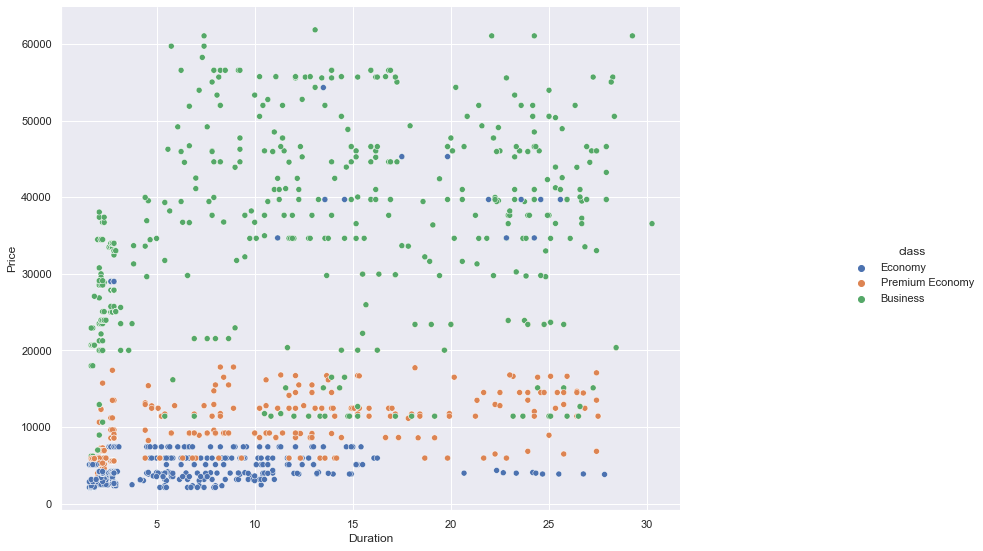

In [73]:
sns.relplot(x="Duration", y="Price", hue="class", data=df)
plt.gcf().set_size_inches(15, 8)

Observations:
    
    1.we cant conclude anything here because many other factors like route, ditance everything matters , lets carry out these querries in tableau.

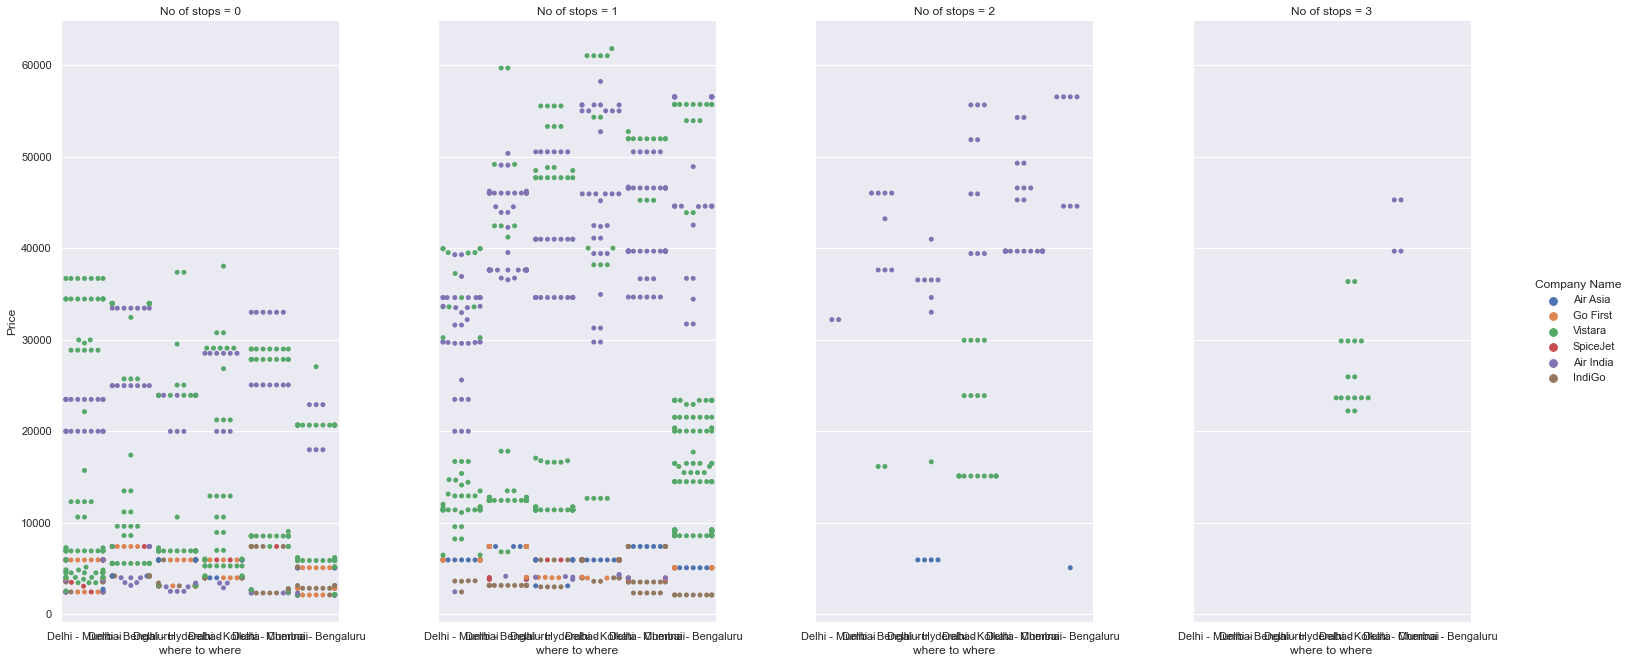

In [76]:
sns.catplot(col="No of stops", y="Price", hue="Company Name",
            x="where to where", aspect=.7,
            kind="swarm", data=df)
plt.gcf().set_size_inches(23, 10)

**Conmpay Name vs Price**

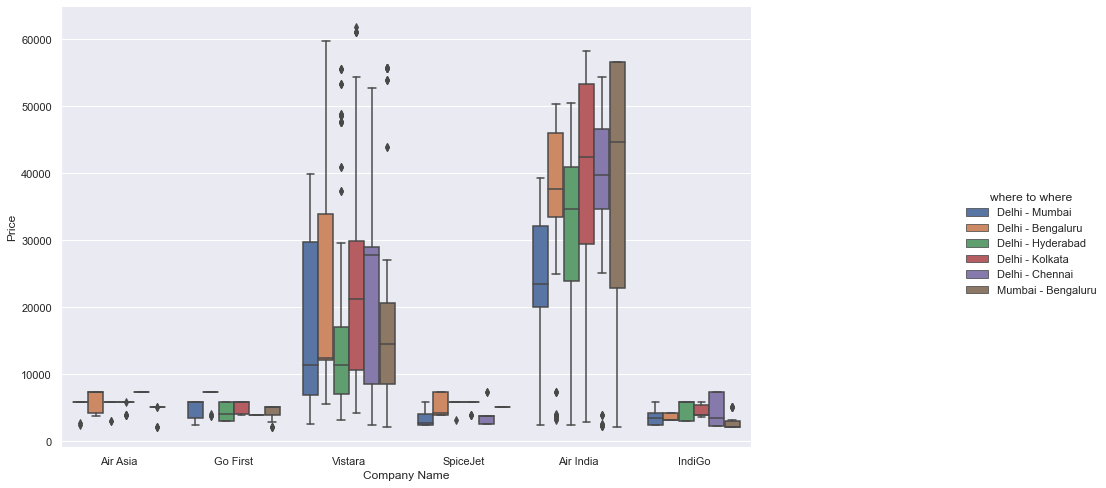

In [83]:
sns.catplot(x="Company Name", y="Price", hue="where to where",
            kind="box", dodge=True, data=df)
plt.gcf().set_size_inches(17, 7)

**If we do analysis here also it wont be accurate because we have to add more than one parameter in hue, so its better to analysis in tableau**

In [84]:
df1.head()

,No of stops,No of days in advanced booked,Route Value,Departure Time,Duration,Price,distance in km,Company Name_Air Asia,Company Name_Air India,Company Name_Go First,Company Name_IndiGo,Company Name_SpiceJet,Company Name_Vistara,class_Business,class_Economy,class_Premium Economy,where to where_Delhi - Bengaluru,where to where_Delhi - Chennai,where to where_Delhi - Hyderabad,where to where_Delhi - Kolkata,where to where_Delhi - Mumbai,where to where_Mumbai - Bengaluru
0,1,1,3,8.00,6.58,5953,1148,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,1,3,9.42,6.58,5953,1148,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,1,3,12.67,7.58,5953,1148,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1,1,3,11.92,8.33,5953,1148,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,1,3,8.00,8.58,5953,1148,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


# Data cleaning and processing

**Lets check which one will work better whether label encoded or one hot encoded**

**Label Encoded accuracy**

In [87]:
x=df2.drop('Price',axis=1)
y=df2['Price']

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [89]:
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.658
RMSE: 9758.016
mean absolute error: 7915.365


**One hot encoded**

In [90]:
x=df1.drop('Price',axis=1)
y=df1['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.806
RMSE: 7336.492
mean absolute error: 5222.846


Observations:
    
    1.From the above observations we can say that one hot encoding performs better than label encoding, so continuing with the df1 for model building.

In [92]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
threshold=3
df2=df1[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df1.shape[0]-df2.shape[0])/df1.shape[0])

percentage of loss of data by zscore is : 0.20478890989287965


Observations:
    1.No need to remove the zscore since loss of data is more than 7%

# Splitting the variables

In [93]:
x=df1.drop('Price',axis=1)
y=df1['Price']

In [94]:
x.shape

(1587, 21)

In [95]:
y.shape

(1587,)

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [97]:
maxAccu=0
ln=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    mod=ln
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.8130704967419911 on random state 149


In [98]:
#lets scale down the values and see the accurary
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [99]:
xs=st.fit_transform(x)

In [102]:
#Checking the accuracy before and after standard scaling
x_train,x_test,y_train,y_test=train_test_split(xs,y,test_size=0.3,random_state=45)
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.77
RMSE: 7863.342
mean absolute error: 5502.066


Observations:
    
    Standard scaling reduces the accuracy and increases the RMSE so no need to do standard scaling.

In [103]:
print('x train shape:',x_train.shape)
print('x test shape',x_test.shape)
print('\n')
print('y train shape:',y_train.shape)
print('y test shape',y_test.shape)

x train shape: (1110, 21)
x test shape (477, 21)


y train shape: (1110,)
y test shape (477,)


# Building the model

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=149)

In [105]:
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.813
RMSE: 7111.926
mean absolute error: 5103.609


In [113]:
#lasso model
ls=Lasso(alpha=9)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predls)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predls)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predls)),3))

r2 score is : 0.813
RMSE: 7104.568
mean absolute error: 5078.614


In [119]:
#Ridge model
rd=Ridge(alpha=16)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrd)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrd)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrd)),3))

r2 score is : 0.814
RMSE: 7099.817
mean absolute error: 5045.134


In [127]:
#ElasticNet model
enr=ElasticNet(alpha=0.001)
enr.fit(x_train,y_train)
predenr=enr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predenr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predenr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predenr)),3))

r2 score is : 0.813
RMSE: 7110.851
mean absolute error: 5100.703


In [128]:
ran = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
ran.fit(x_train, y_train)
predran=ran.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predran)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predran)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predran)),3))

r2 score is : 0.762
RMSE: 8019.396
mean absolute error: 4890.685


In [132]:
svr=SVR()
svr.fit(x_train, y_train)
predpoly=svr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predpoly)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predpoly)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predpoly)),3))

r2 score is : -0.169
RMSE: 17787.638
mean absolute error: 13066.372


In [133]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf)),3))

r2 score is : 0.976
RMSE: 2537.227
mean absolute error: 1190.071


In [134]:
from sklearn.ensemble import AdaBoostRegressor

In [135]:
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
predada=ada.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predada)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predada)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predada)),3))

r2 score is : 0.847
RMSE: 6424.581
mean absolute error: 5423.27


# Cross Validation Score

In [141]:
models=[ln,ls,rd,enr,ran,svr,rf,ada]
for m in models:
    
    score=cross_val_score(m,x,y,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LinearRegression() score is:
0.672


Lasso(alpha=9) score is:
0.676


Ridge(alpha=16) score is:
0.688


ElasticNet(alpha=0.001) score is:
0.673


RANSACRegressor(base_estimator=LinearRegression()) score is:
0.688


SVR() score is:
-0.241


RandomForestRegressor() score is:
0.772


AdaBoostRegressor() score is:
0.687




Observations:
    
    1.The best model is Random Forest Regressor

# Hyper Parameter tuning

In [142]:
rf=RandomForestRegressor()
grid_param={
    'criterion':['mse','mae'],
    
    'max_depth':[10,20,30,40,50],
    'max_features':['auto', 'sqrt', 'log2'],
    'min_samples_split':[2,5,10,15,20],
    'bootstrap':[True,False]
}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='r2',
                  cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 40, 'max_features': 'auto', 'min_samples_split': 20}
0.7991795802183211


In [143]:
rf1=RandomForestRegressor(n_estimators=100,criterion='mse',max_depth=40,max_features='auto',min_samples_split=20,bootstrap=True)

In [144]:
rf1.fit(x_train, y_train)
predrf1=rf1.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf1)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf1)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf1)),3))

r2 score is : 0.958
RMSE: 3381.928
mean absolute error: 1849.739


# Saving the model

In [145]:
import joblib
joblib.dump(rf,'flightfinal.obj')

['flightfinal.obj']